## ELK WOLF_SEUNGU LYU VERSION

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
state = State(elk = 1, wolf = 1)
system = System(alpha = 0.05,
                beta = 0.1,
                gamma = 0.1,
                delta = 0.1)

,values
alpha,0.05
beta,0.10
gamma,0.10
delta,0.10


In [11]:
def update_func(state, t, system):
    unpack(system)
   
    x, y = state
    
    x += alpha*x - beta*x*y
    y += delta*x*y - gamma*y
    
    return State(elk=x, wolf=y)

In [12]:
def run_simulation(system, update_func, state, t_end):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[0] = state
    
    for t in linrange(0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [13]:
frame = run_simulation(system, update_func, state, 2000)

,elk,wolf
0,1,1
1,0.95,0.995
2,0.902975,0.985346
3,0.859149,0.971467
4,0.818643,0.953849
5,0.781489,0.933007
6,0.74765,0.909462
7,0.717037,0.883728
8,0.689522,0.85629
9,0.664955,0.8276


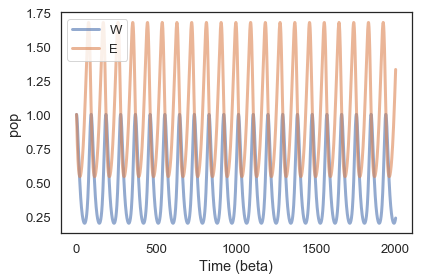

In [14]:
plot(frame['wolf'], label='W')
plot(frame['elk'], label='E')
#plot(frame['V'], label='V')
decorate(xlabel='Time (beta)',
         ylabel='pop',
         loc='upper left')